In [1]:
# CSV파일을 이용하여 kaggle의 cat&dog 전체이미지학습과 평가
# CNN구현

#필요한 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [4]:
#Raw Data Loading
df=pd.read_csv('/content/drive/MyDrive/빅데이터 과정 폴더/data/개와 고양이 전체 데이터/train.csv')
display(df.head(),df.shape)

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,6350,6351,6352,6353,6354,6355,6356,6357,6358,6359,6360,6361,6362,6363,6364,6365,6366,6367,6368,6369,6370,6371,6372,6373,6374,6375,6376,6377,6378,6379,6380,6381,6382,6383,6384,6385,6386,6387,6388,6389,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,0,41,9,12,16,29,28,20,33,29,27,25,27,31,39,41,41,39,30,14,21,25,27,31,32,32,39,48,52,35,43,44,37,34,37,43,49,43,31,21,13,20,33,27,19,24,27,32,14,38,...,235,233,235,231,226,216,216,212,203,181,154,137,134,106,110,80,82,78,70,80,74,72,57,74,58,47,58,39,53,43,37,39,39,34,35,46,70,65,76,66,74,57,43,47,9,36,8,2,3,3
1,1,15,19,20,19,13,16,25,17,11,24,19,11,11,12,15,90,101,103,99,99,83,74,72,72,69,68,73,75,75,82,89,84,75,75,89,86,84,76,69,66,73,74,59,64,77,78,78,77,84,...,129,124,99,91,104,92,87,80,77,105,94,100,112,123,132,132,145,139,122,107,116,114,123,118,116,111,113,107,113,107,99,108,96,81,86,107,96,87,95,85,91,84,91,90,88,82,90,89,97,91
2,1,82,88,93,96,98,101,101,100,102,96,107,107,47,41,46,45,44,49,61,73,77,70,71,71,34,46,38,40,39,41,42,40,35,42,37,42,38,37,36,34,16,48,52,25,56,49,51,58,60,...,35,34,37,32,33,38,36,36,35,36,35,33,37,37,38,41,41,46,41,46,41,39,36,35,34,34,30,32,11,19,11,7,13,20,32,35,40,36,28,26,28,31,36,36,36,36,37,36,35,35
3,0,103,103,101,99,101,99,98,98,98,99,99,98,97,97,97,117,119,128,133,138,140,143,111,141,141,144,144,133,95,14,8,9,10,16,81,85,82,86,73,49,33,33,36,24,36,31,30,23,14,...,73,72,72,68,90,106,109,156,153,95,59,65,50,81,87,106,122,167,175,181,182,182,183,185,183,183,184,182,183,183,182,184,181,180,179,180,180,179,177,176,176,174,173,172,172,172,172,170,170,169
4,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254,254,254,255,254,254,254,253,255,253,253,247,239,239,240,236,236,233,237,234,234,242,239,243,253,255,...,255,254,245,240,235,233,228,216,215,197,220,227,217,215,221,225,224,238,253,254,253,253,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255


(25000, 6401)

In [6]:
#label(target)data와 pixel data를 분리
# 데이터 확인하기 위해서
label_data = df['label'].values #1차원 ndarray
pixel_data = df.drop('label', axis=1, inplace=False).values #2차원 ndarray

0


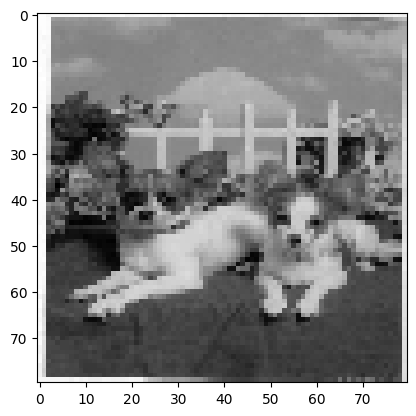

In [7]:
# 샘플 이미지 확인
plt.imshow(pixel_data[150].reshape(80,80),cmap='gray')
print(label_data[153])
plt.show()

In [8]:
# 데이터 전처리
# 1. 결측치 - 없어요!
# 2. 이상치 - 없어요!
# 3. 정규화처리
scaler = MinMaxScaler()
scaler.fit(pixel_data)
x_data_norm = scaler.transform(pixel_data)
# 4. train, test 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 label_data.reshape(-1,1),
                 test_size=0.3)

In [13]:
# Model구현
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu',
                 padding='same',
                 input_shape=(80,80,1)))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu'))

model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

# FC Layer(Classifier - 분류기)
model.add(Flatten())

model.add(Dense(units=256,
                activation='relu'))

model.add(Dropout(rate=0.4))

model.add(Dense(units=1,
                activation='sigmoid'))

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 80, 80, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 40, 40, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 20, 20, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 conv2d_9 (Conv2D)           (None, 20, 20, 256)      

In [ ]:
# 학습 설정하고 학습 진행!
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 일반적으로 callback을 설정
# 우리는 callback을 설정하지 않고 학습을 진행

history = model.fit(x_data_train_norm.reshape(-1,80,80,1),
                    t_data_train,
                    epochs=100,
                    verbose=1,
                    batch_size=100,
                    validation_split=0.3)

Epoch 1/100
 66/123 [===============>..............] - ETA: 3:16 - loss: 0.6924 - accuracy: 0.5280

In [ ]:
#학습이 잘 되었으면 이제 모델 평가
print(model.evaluate(x_data_test_norm.resahpe(-1,80,80,1),
                     t_data_test))

In [ ]:
#마직막으로 그래프를 그려보아요
fig = plt.figure()

ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)

ax1.plot(history.history['loss'],color='r')
ax1.plot(history.history['val_loss'],color='b')

ax2.plot(history.history['accuracy'],color='r')
ax2.plot(history.history['val_accuracy'],color='b')

plt.tight_layout()
plt.show()